# Visualizing the normal bivariate distribution.

This notebook is the companion of the following [**put post name**]. Refer to it for an explanation. 

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter
from scipy.stats import multivariate_normal
%matplotlib notebook

In [93]:
#Defining parameters of normal distribution - zero cov
from scipy.stats import multivariate_normal
mean = [0, 0]
cov = [[1, 0], [0, 1]] 
x = np.arange(-3,3.1, 0.1)
y = np.arange(-3,3.1, 0.1).T
mv_nom = multivariate_normal(mean=mean, cov=cov)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
Z = mv_nom.pdf(pos)

<IPython.core.display.Javascript object>


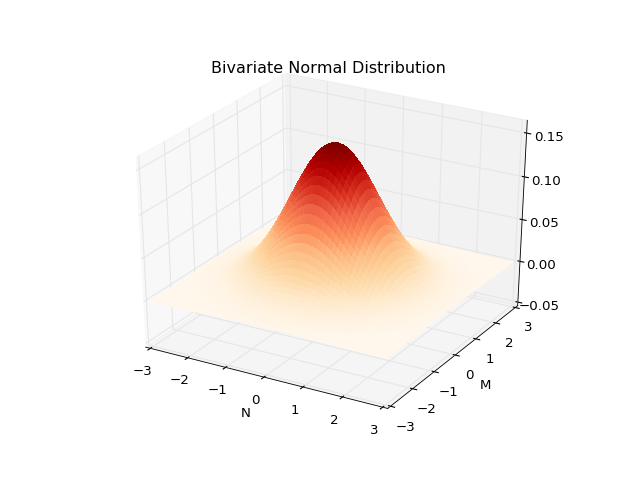

(-3, 3)

In [94]:
#Graphin bivariate normal - 
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.OrRd,
                       linewidth=0, antialiased=False)

ax.set_zlim(-.05, .16)
ax.set_title("Bivariate Normal Distribution")
ax.set_xlabel('N')
ax.set_ylabel('M')
ax.set_ylim3d(-3, 3)
ax.set_xlim3d(-3, 3)

<IPython.core.display.Javascript object>


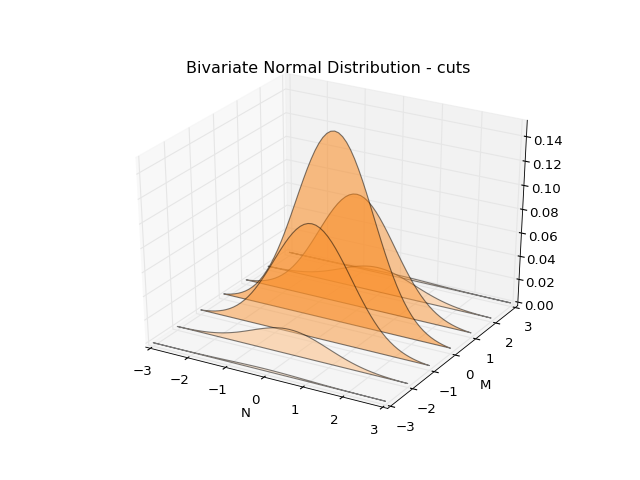

In [28]:
#Graphing distributions with cuts
def cc(arg):
    return colorConverter.to_rgba(arg, alpha=0.6)
verts = []
y_cuts = np.arange(-3, 4, 1) #cuts at -3, -2, -1, 0, 1, 2, 3
cuts = np.arange(0, 70, 10)
for i in cuts:
    x_coord = pos[i]
    z_coord = mv_nom.pdf(pos[i])
    verts.append(list(zip(x_coord[:,0], z_coord)))

fig = plt.figure()
ax = fig.gca(projection='3d')
polyg = PolyCollection(verts, facecolors=[cc('#FBD8B6'), cc('#FDBB7B'), cc('#F99434'), cc('#FA810E'), cc('#F99434'), cc('#FDBB7B'), cc('#FBD8B6')])
ax.add_collection3d(polyg, zs=y_cuts, zdir='y')
polyg.set_alpha(0.5)
ax.set_xlabel('N')
ax.set_xlim3d(-3, 3)
ax.set_ylabel('M')
ax.set_ylim3d(-3, 3)
ax.set_zlim3d(0, 0.15)
ax.set_title("Bivariate Normal Distribution - cuts")

<IPython.core.display.Javascript object>


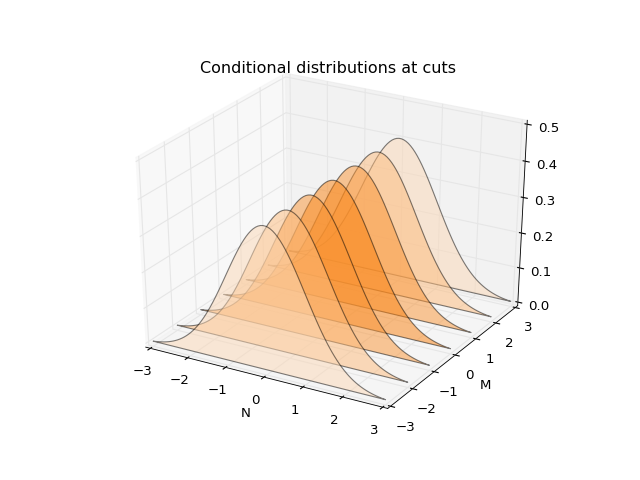

In [95]:
#Graphing conditional distribution - no covariance
uv_norm = multivariate_normal(mean=0, cov=1)
x_range = np.linspace(-3, 3, 100)
verts = []
for i in range(7):
    z_coord = uv_norm.pdf(x_range)
    verts.append(list(zip(x_range, z_coord)))
fig = plt.figure()
ax = fig.gca(projection='3d')
polyg = PolyCollection(verts, facecolors=[cc('#FBD8B6'), cc('#FDBB7B'), cc('#F99434'), cc('#FA810E'), cc('#F99434'), cc('#FDBB7B'), cc('#FBD8B6')])
ax.add_collection3d(polyg, zs=y_cuts, zdir='y')
polyg.set_alpha(0.5)
ax.set_xlabel('N')
ax.set_xlim3d(-3, 3)
ax.set_ylabel('M')
ax.set_ylim3d(-3, 3)
ax.set_zlim3d(0, 0.5)
ax.set_title("Conditional distributions at cuts")

<IPython.core.display.Javascript object>


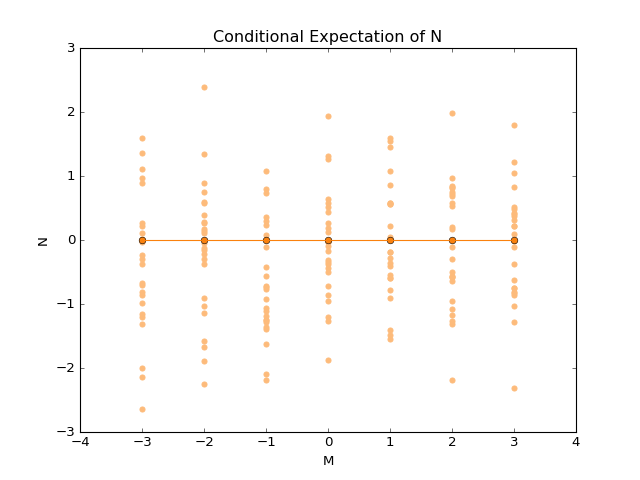

(-3, 3)

In [47]:
## Plotting conditional expectation
cond_exp = np.repeat(0,7)
var_cond = 1
verts = np.array(verts)
fig , ax = plt.subplots(1, 1)
for index, cut in enumerate(y_cuts):
    uv_norm = multivariate_normal(mean=cond_exp[index], cov=var_cond)
    random_samp = uv_norm.rvs(25)
    ax.scatter(np.repeat(cut, len(random_samp)), random_samp, color="#FDBB7B")
    ax.plot(cut, cond_exp[index], marker = 'o', color ="#FA810E")
ax.plot(y_cuts, cond_exp, color ="#FA810E")
ax.set_title("Conditional Expectation of N")
ax.set_xlabel("M")
ax.set_ylabel("N")
ax.set_ylim(-3,3)

<IPython.core.display.Javascript object>


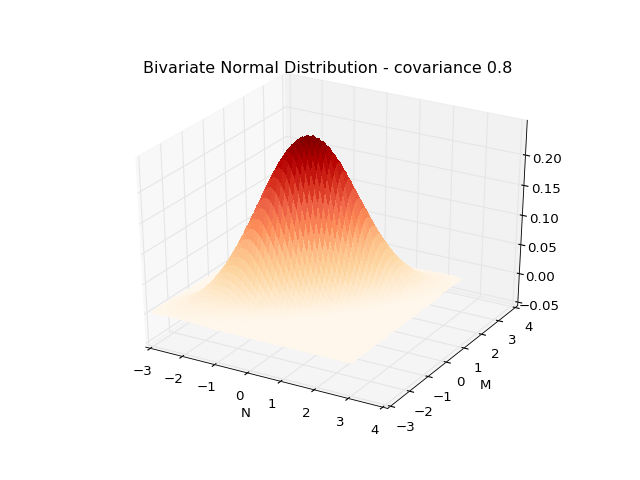

In [96]:
# Bivariate distribution with positive correlation
mean = [0, 0]
cov = [[1, 0.8], [0.8, 1]] 
x = np.arange(-3,3.1, 0.1)
y = np.arange(-3,3.1, 0.1).T
mv_nom = multivariate_normal(mean=mean, cov=cov)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
Z = mv_nom.pdf(pos)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.OrRd,
                       linewidth=0, antialiased=False)
ax.set_zlim(-.05, .25)
ax.set_title("Bivariate Normal Distribution - covariance 0.8")
ax.set_xlabel('N')
ax.set_ylabel('M')


<IPython.core.display.Javascript object>


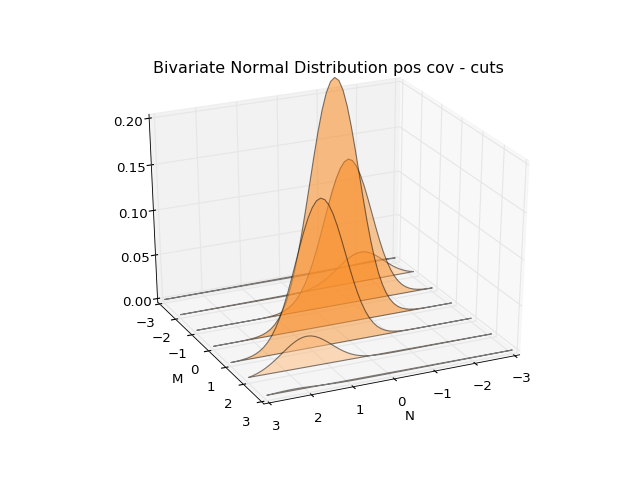

In [72]:
verts = []
y_cuts = np.arange(-3, 4, 1) #cuts at -3, -2, -1, 0, 1, 2, 3
cuts = np.arange(0, 70, 10)
for i in cuts:
    x_coord = pos[i]
    z_coord = mv_nom.pdf(pos[i])
    verts.append(list(zip(x_coord[:,0], z_coord)))
fig = plt.figure()
ax = fig.gca(projection='3d')
polyg = PolyCollection(verts, facecolors=[cc('#FBD8B6'), cc('#FDBB7B'), cc('#F99434'), cc('#FA810E'), cc('#F99434'), cc('#FDBB7B'), cc('#FBD8B6')])
ax.add_collection3d(polyg, zs=y_cuts, zdir='y')
polyg.set_alpha(0.5)
ax.set_xlabel('N')
ax.set_xlim3d(-3, 3)
ax.set_ylabel('M')
ax.set_ylim3d(-3, 3)
ax.set_zlim3d(0, 0.20)
ax.set_title("Bivariate Normal Distribution pos cov - cuts")

<IPython.core.display.Javascript object>


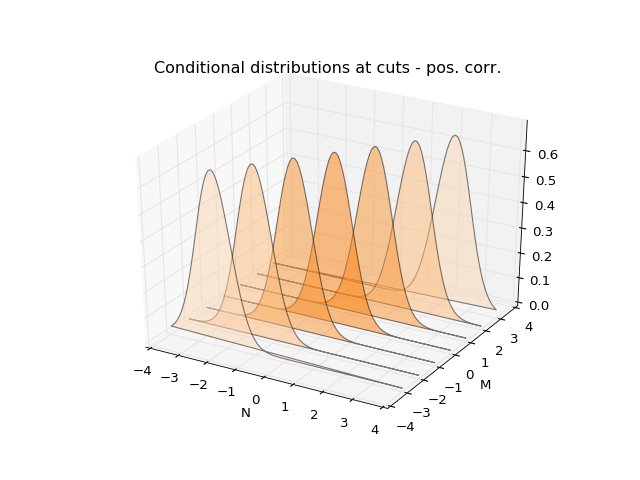

In [97]:
#Conditional distributions at cuts
cond_exp = 0.8*y_cuts
var_cond = (1-(0.8)**2)
x_range = np.linspace(-4, 4, 100)
verts = []
for exp in cond_exp:
    uv_norm = multivariate_normal(mean=exp, cov=var_cond)
    z_coord = uv_norm.pdf(x_range)
    verts.append(list(zip(x_range, z_coord)))
    
fig = plt.figure()
ax = fig.gca(projection='3d')
polyg = PolyCollection(verts, facecolors=[cc('#FBD8B6'), cc('#FDBB7B'), cc('#F99434'), cc('#FA810E'), cc('#F99434'), cc('#FDBB7B'), cc('#FBD8B6')])
ax.add_collection3d(polyg, zs=y_cuts, zdir='y')
polyg.set_alpha(0.5)
ax.set_xlabel('N')
ax.set_xlim3d(-4, 4)
ax.set_ylabel('M')
ax.set_ylim3d(-4, 4)
ax.set_zlim3d(0, 0.7)
ax.set_title("Conditional distributions at cuts - pos. corr.")

<IPython.core.display.Javascript object>


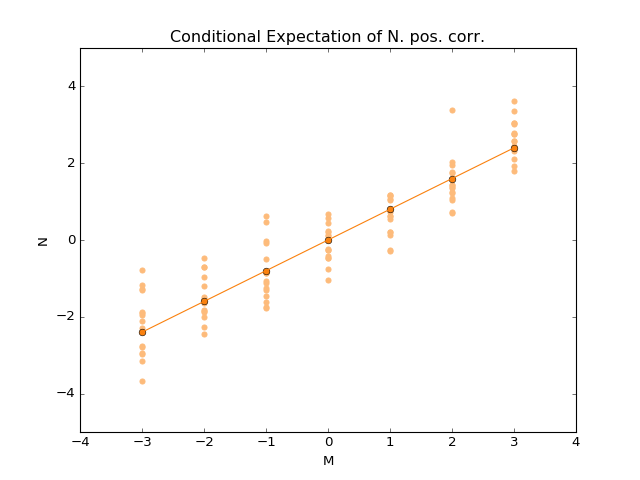

In [98]:
cond_exp = 0.8*y_cuts
var_cond = (1-(0.8)**2)
verts = np.array(verts)
fig , ax = plt.subplots(1, 1)
for index, cut in enumerate(y_cuts):
    uv_norm = multivariate_normal(mean=cond_exp[index], cov=var_cond)
    random_samp = uv_norm.rvs(15)
    ax.scatter(np.repeat(cut, len(random_samp)), random_samp, color="#FDBB7B")
    ax.plot(cut, cond_exp[index], marker = 'o', color ="#FA810E")
ax.plot(y_cuts, cond_exp, color ="#FA810E")
ax.set_title("Conditional Expectation of N. pos. corr.")
ax.set_xlabel("M")
ax.set_ylabel("N")